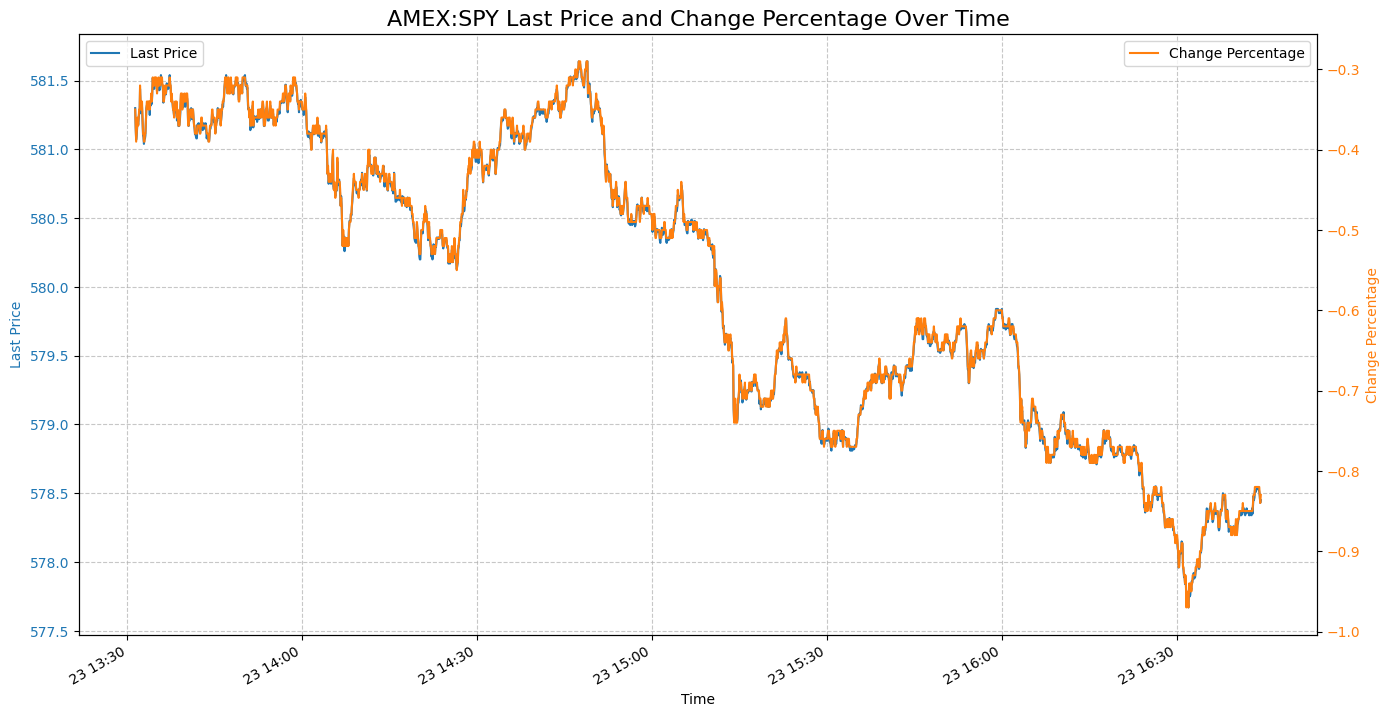

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Define column names
columns = ['now', 'lp_time', 'quote_age', 'lp', 'ch', 'chp', 'volume', 'prev_close']

# Load the CSV file
df = pd.read_csv('../output/2024-10-23-AMEX:SPY-regular-quote.csv', header=None, names=columns)

# Convert 'now' column to datetime
df['now'] = pd.to_datetime(df['now'], unit='s')

# Trim records before market open (9:30 AM ET) and after market close (4:00 PM ET)
df['now_et'] = df['now'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
market_open = df['now_et'].dt.normalize() + pd.Timedelta(hours=9, minutes=30)
market_close = df['now_et'].dt.normalize() + pd.Timedelta(hours=16)
df = df[(df['now_et'] >= market_open) & (df['now_et'] <= market_close)]
df = df.drop(columns=['now_et'])

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot lp on primary axis
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Last Price', color=color)
ax1.plot(df['now'], df['lp'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create secondary axis
ax2 = ax1.twinx()

# Plot chp on secondary axis
color = 'tab:orange'
ax2.set_ylabel('Change Percentage', color=color)
ax2.plot(df['now'], df['chp'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Set title and adjust layout
plt.title('AMEX:SPY Last Price and Change Percentage Over Time', fontsize=16)
fig.tight_layout()

# Improve x-axis readability
plt.gcf().autofmt_xdate()  # Rotation and alignment of tick labels

# Add legend
ax1.legend(['Last Price'], loc='upper left')
ax2.legend(['Change Percentage'], loc='upper right')

# Add grid for better readability
ax1.grid(True, linestyle='--', alpha=0.7)

plt.show()